<a href="https://colab.research.google.com/github/SebastianBenini/Financial_Fraud_Detection/blob/main/Financial_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

#**1. Configuración del Ambiente**


---




In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=69bcefbfa067143fcc1d1a912e5a5770c02c5348c5d7f1d79a9295f8ffe6815e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


#**2. Preprocesamiento de Datos**


---


In [76]:
df_banco = pd.read_csv("https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/fraud_dataset_example.csv")
df_banco.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [77]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [78]:
#@title
def procesar_datos():
  global df_banco
  #Creacion de la variable type2
  df_banco["type2"] = df_banco["nameDest"].apply(lambda x : "CC" if x[0] == "C" else "CM")
  #Convierto los valores categoricos a continuos con el metodo get_dummies
  df_banco = pd.get_dummies(df_banco, columns=['type','type2'], dtype=int)
  #Elimino Columnas prescindibles
  df_banco.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis=1, inplace=True)
  #Eliminando duplicados
  df_banco.drop_duplicates(inplace=True)
  # Tratamiento de nulos
  df_banco.dropna(inplace=True)

In [79]:
procesar_datos()
df_banco.head()

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,0,0,0,0,1,0,0,1
1,1,1864.28,0,0,0,0,1,0,0,1
2,1,181.00,1,0,0,0,0,1,1,0
3,1,181.00,1,0,1,0,0,0,1,0
4,1,11668.14,0,0,0,0,1,0,0,1


In [80]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101518 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step           101518 non-null  int64  
 1   amount         101518 non-null  float64
 2   isFraud        101518 non-null  int64  
 3   type_CASH_IN   101518 non-null  int64  
 4   type_CASH_OUT  101518 non-null  int64  
 5   type_DEBIT     101518 non-null  int64  
 6   type_PAYMENT   101518 non-null  int64  
 7   type_TRANSFER  101518 non-null  int64  
 8   type2_CC       101518 non-null  int64  
 9   type2_CM       101518 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 8.5 MB


#**3. Exploración de Datos**


---


<Axes: >

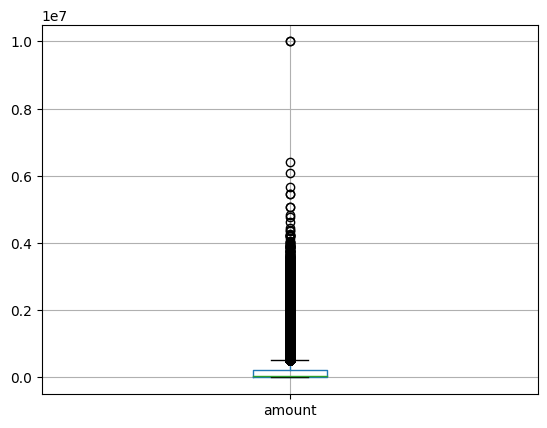

In [81]:
df_banco.boxplot(["amount"])
#df_banco.boxplot(["step"])
#df_banco.boxplot(["isFraud"])
#Observo que la mayor concentracion de datos se encuentra entre 0.0 y 0.5.
#Considero que esta bien analizar los fraudes entre 0.0 y 0.5 ya que mas de eso es un gran fraude lo cual no es objetivo de este analisis.

In [87]:
df_banco[df_banco["amount"]>=500000].shape
#observo que 6850 registros van a ser dropeadas, lo cual no afecta a la base de datos original la cual cuenta como ya vimos con 100.000 registros
#realizare un

def boxploting():
  global df_banco
  amount = df_banco["amount"]
  q1 = amount.quantile(.25)
  q3 = amount.quantile(.75)
  iiq = q3 - q1
  limite_inferior = q1 - 1.5 * iiq
  limite_superior = q3 + 1.5 * iiq
  select = ((amount >= limite_inferior) & (amount <= limite_superior))
  df_banco = df_banco[select]


<Axes: >

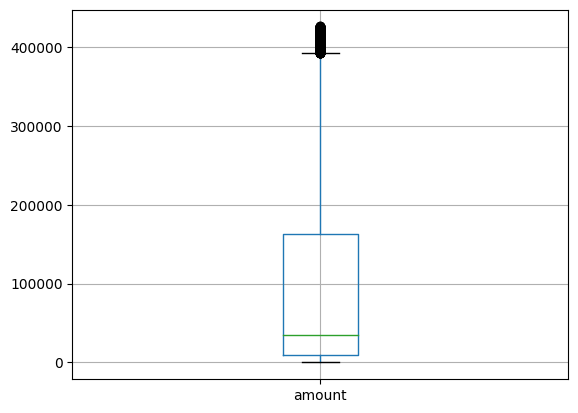

In [88]:
boxploting()
df_banco.boxplot(["amount"])
#Observemos que ahora que la mayor frecuencia de montos es de entre 20.000 y 160.000

array([[<Axes: title={'center': 'amount'}>]], dtype=object)

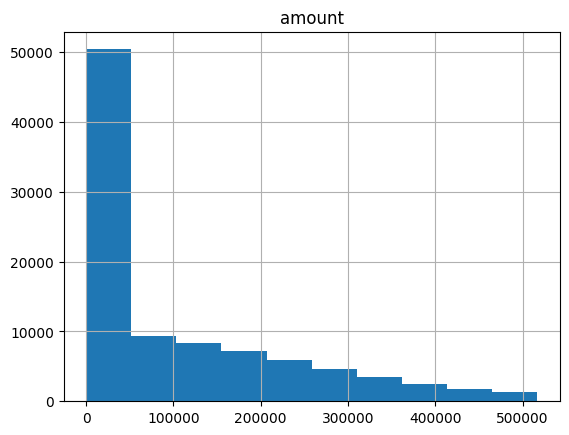

In [84]:
df_banco.hist(["amount"])

In [89]:
def retratamiento_de_datos():
  #Eliminando duplicados
  df_banco.drop_duplicates(inplace=True)
  #Tratamiento de nulos
  df_banco.dropna(inplace=True)
retratamiento_de_datos()

In [91]:
df_banco.shape

(92480, 10)

In [17]:
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

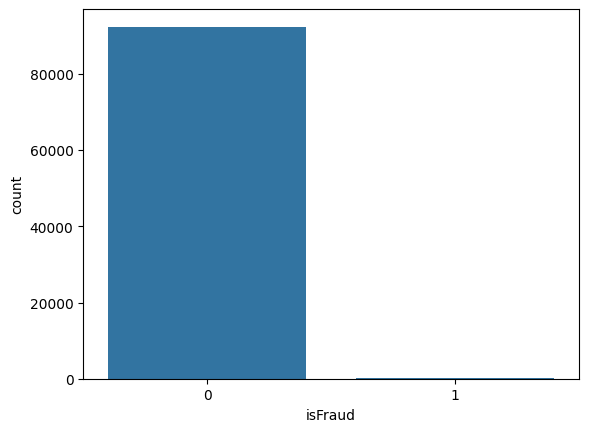

In [94]:
#Variable isFraud desbalanceada
%matplotlib inline
ax = sns.countplot(x="isFraud", data=df_banco)

In [97]:
df_banco["isFraud"].value_counts()

isFraud
0    92388
1       92
Name: count, dtype: int64

In [98]:
#la variable target esta muy desbalanceada, vamos a corregir esto
from imblearn.over_sampling import SMOTE

In [105]:
#@title
def balanceo_clases():
  global df_banco
  x = df_banco.drop("isFraud", axis=1)
  y = df_banco["isFraud"]
  smt = SMOTE(random_state=77)
  x, y = smt.fit_resample(x,y)
  df_banco = pd.concat([x,y], axis=1)
  #Eliminando duplicados
  df_banco.drop_duplicates(inplace=True)
  #Tratamiento de nulos
  df_banco.dropna(inplace=True)

In [106]:
df_banco["isFraud"].value_counts()

isFraud
0    92388
1    92388
Name: count, dtype: int64

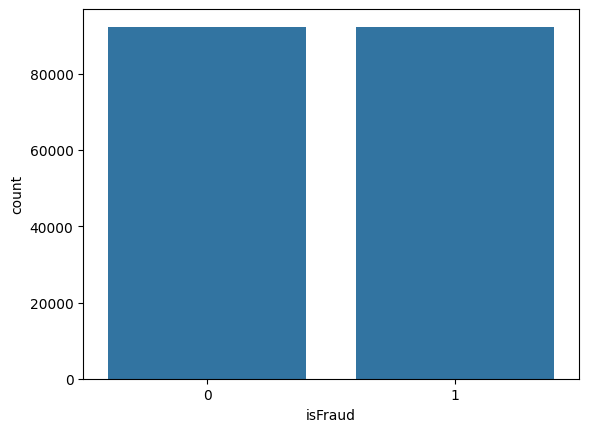

In [104]:
%matplotlib inline
ax = sns.countplot(x="isFraud", data=df_banco)
#se balancearon las clases

In [100]:
balanceo_clases()
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**4. Construcción de Modelos**


---


In [ ]:
#@title
def crea_modelos():
  global df_banco, resultados
  #tu código aquí

In [ ]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1-score'][i]}")
    print(f"AUC-ROC: {resultados['AUC-ROC'][i]}\n")

#**5. Evaluación y Selección del Modelo**


---


In [ ]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  #tu código aquí

In [ ]:
visualiza_resultados()